In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_excel('dat.xlsx')

In [3]:
print(df.head())

print(df.info())

   Wavelength  Camera_Value  Nitrogen
0      390.04       285.939         0
1      392.07       285.026         0
2      394.09       286.387         0
3      396.12       289.463         0
4      398.14       294.615         0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14400 entries, 0 to 14399
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Wavelength    14400 non-null  float64
 1   Camera_Value  14400 non-null  float64
 2   Nitrogen      14400 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 337.6 KB
None


/Users/anastasiavinogradskaa/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


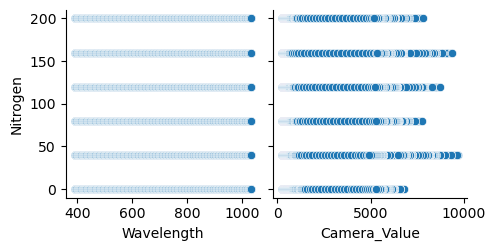

In [4]:
sns.pairplot(df, x_vars=['Wavelength', 'Camera_Value'], y_vars=['Nitrogen'], kind='scatter')
plt.show()

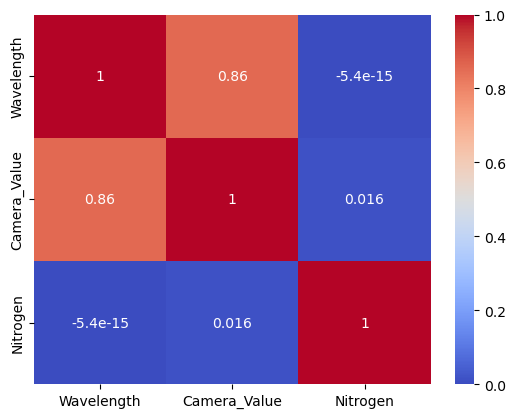

In [5]:
correlation_matrix = df[['Wavelength', 'Camera_Value', 'Nitrogen']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [6]:
X = df[['Wavelength', 'Camera_Value']]
y = df['Nitrogen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
model = RandomForestRegressor()
model.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [9]:
y_pred = model.predict(X_test_scaled)


In [10]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [11]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 4344.057388888888
R-squared: 0.06766449740185465


In [13]:
new_data = pd.DataFrame({'Wavelength': [400], 'Camera_Value': [301]})
new_data_scaled = scaler.transform(new_data)
predicted_nitrogen = model.predict(new_data_scaled)
print(f'Predicted Nitrogen: {predicted_nitrogen}')

Predicted Nitrogen: [40.4]
